In [1]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# EJERCICIO 1: ventilador
## Definicion de las variables de universo

In [2]:
# variable de entrada
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')              # temperatura de 0 a 40 grados

# variable de salida
velocidad_vent= ctrl.Consequent(np.arange(0, 101, 1), 'velocidad_ventilador')  # de 0 al 100%

## Creación de las funciones de pertenencia

In [3]:
# se definen tres conjuntos borrosos temperatura baja media y alta

temperatura['baja'] = fuzz.trimf(temperatura.universe, [0, 0, 15])
temperatura['media'] = fuzz.trimf(temperatura.universe, [10, 20, 30])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [25, 40, 40])

# se definen las funciones de pertenencia para el ventilador con tres respuestas

velocidad_vent['lenta'] = fuzz.trimf(velocidad_vent.universe, [0, 0, 40])
velocidad_vent['media'] = fuzz.trimf(velocidad_vent.universe, [30, 50, 70])
velocidad_vent['rapida'] = fuzz.trimf(velocidad_vent.universe, [60, 100, 100])

### Visualizando los universos de discurso y los conjuntos borrosos

In [4]:
# plt.figure(figsize=(15, 9))  # Puedes ajustar el tamaño a tus necesidades

# # Visualizar la función de pertenencia para la temperatura
# temperatura.view()

# # Mostrar el gráfico
# plt.show()

In [5]:
# plt.figure(figsize=(8, 5))

# # Generar el gráfico
# temperatura['baja'].view()

# # Acceder a las líneas del gráfico y cambiar colores
# for line in plt.gca().lines:
#     line.set_color('red')  # Cambia 'red' por el color de tu elección

# plt.show()

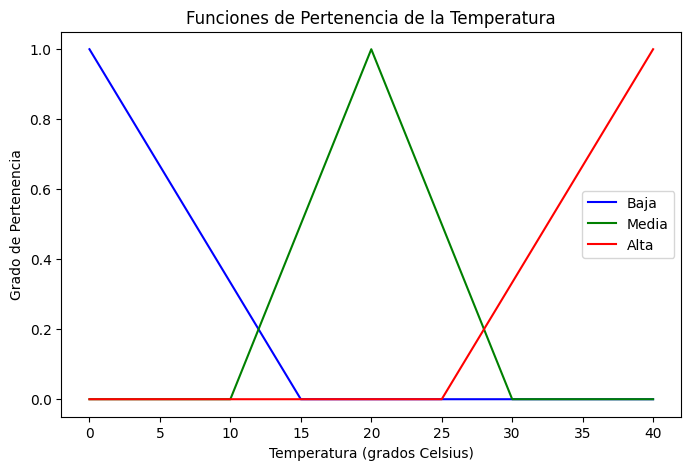

In [6]:
# Datos de la variable y sus conjuntos difusos
temperatura_baja = fuzz.trimf(temperatura.universe, [0, 0, 15])
temperatura_media = fuzz.trimf(temperatura.universe, [10, 20, 30])
temperatura_alta = fuzz.trimf(temperatura.universe, [25, 40, 40])

# Crear la figura y los ejes
plt.figure(figsize=(8, 5))

# Trazar cada función de pertenencia
plt.plot(temperatura.universe, temperatura_baja, label='Baja', color='blue')
plt.plot(temperatura.universe, temperatura_media, label='Media', color='green')
plt.plot(temperatura.universe, temperatura_alta, label='Alta', color='red')

# Añadir leyendas y etiquetas
plt.title('Funciones de Pertenencia de la Temperatura')
plt.xlabel('Temperatura (grados Celsius)')
plt.ylabel('Grado de Pertenencia')
plt.legend()

# Mostrar el gráfico
plt.show()

c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\Apuntes_plantillas\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


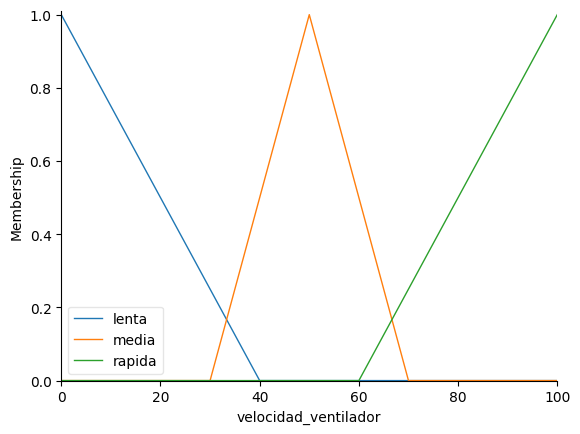

In [7]:
velocidad_vent.view()
plt.show()

## Definición de las reglas difusas

In [8]:
# Reglas difusas
# Se definen las reglas para relacionar la temperatura con la velocidad del ventilador
regla1 = ctrl.Rule(temperatura['baja'], velocidad_vent['lenta'])
regla2 = ctrl.Rule(temperatura['media'], velocidad_vent['media'])
regla3 = ctrl.Rule(temperatura['alta'], velocidad_vent['rapida'])

# Sistema de control y simulación
# Se crea un sistema de control con las reglas definidas
control_ventilador = ctrl.ControlSystem([regla1, regla2, regla3])

## simulación del sistema borroso

In [9]:
# Se prepara una simulación de ese sistema
simulacion_ventilador = ctrl.ControlSystemSimulation(control_ventilador)

# Simulación con una entrada específica
# Se introduce una temperatura de entrada, por ejemplo, 30 grados
temperatura_entrada = 30  
simulacion_ventilador.input['temperatura'] = temperatura_entrada

# Se calcula la salida basada en las reglas difusas
simulacion_ventilador.compute()

# Obtener la salida
# La velocidad del ventilador se obtiene como un porcentaje
velocidad_calculada = simulacion_ventilador.output['velocidad_ventilador']
print("Velocidad del ventilador calculada:", velocidad_calculada)

Velocidad del ventilador calculada: 83.11111111111109


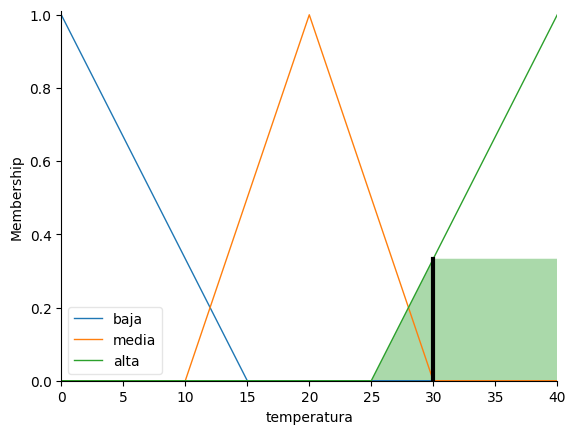

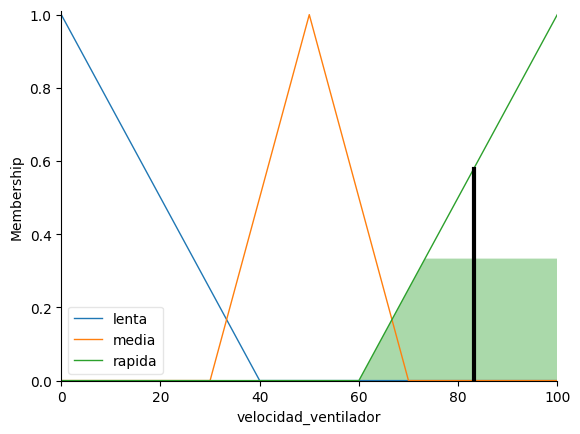

In [10]:
# Establecer la entrada y ejecutar la simulación
simulacion_ventilador.input['temperatura'] = 30  # Ejemplo de temperatura
simulacion_ventilador.compute()

# Visualizar la entrada
temperatura.view(sim=simulacion_ventilador)

# Visualizar la salida
velocidad_vent.view(sim=simulacion_ventilador)
plt.show()

# Ejercicio 2: sistema de iluminación de una habitación

## definiendo las variables de universo 


In [11]:
# variables de entrada
luz_natural = ctrl.Antecedent(np.arange(0, 101, 1), 'luz_natural')              # variable entre 0 y 100
ocupacion = ctrl.Antecedent(np.arange(0, 11, 1), 'ocupacion')                   # entre 0 y 10 personas

# variable de salida
luz_artificial = ctrl.Consequent(np.arange(0, 101, 1), 'luz_artificial')  # de 0 al 100%

## creando las funciones de pertenencia

In [12]:
# conjuntos borrosos para luz natural
luz_natural['muy_oscuro'] = fuzz.trapmf(luz_natural.universe, [0, 0, 15, 30])
luz_natural['oscuro'] = fuzz.trimf(luz_natural.universe, [20, 35, 50])
luz_natural['moderado'] = fuzz.trimf(luz_natural.universe, [30, 50, 70])
luz_natural['iluminado'] = fuzz.trimf(luz_natural.universe, [50, 70, 90])
luz_natural['muy_iluminado'] = fuzz.trapmf(luz_natural.universe, [70, 90, 100, 100])

# conjuntos borrosos para ocupacion
ocupacion['vacia'] = fuzz.trimf(ocupacion.universe, [0, 0, 2])
ocupacion['poco_ocupada'] = fuzz.trimf(ocupacion.universe, [1, 3, 5])
ocupacion['moderamente_ocupada'] = fuzz.trimf(ocupacion.universe, [4, 6, 8])
ocupacion['muy_ocupada'] = fuzz.trapmf(ocupacion.universe, [7, 9, 10, 10])



# conjuntos borrosos de la variable de salida luz artificial
luz_artificial['muy_baja'] = fuzz.trapmf(luz_artificial.universe, [0, 0, 15, 30])
luz_artificial['baja'] = fuzz.trimf(luz_artificial.universe, [20, 40, 50])
luz_artificial['media'] = fuzz.trimf(luz_artificial.universe, [40, 50, 60])
luz_artificial['alta'] = fuzz.trimf(luz_artificial.universe, [50, 65, 80])
luz_artificial['muy_alta'] = fuzz.trapmf(luz_artificial.universe, [70, 90, 100, 100])

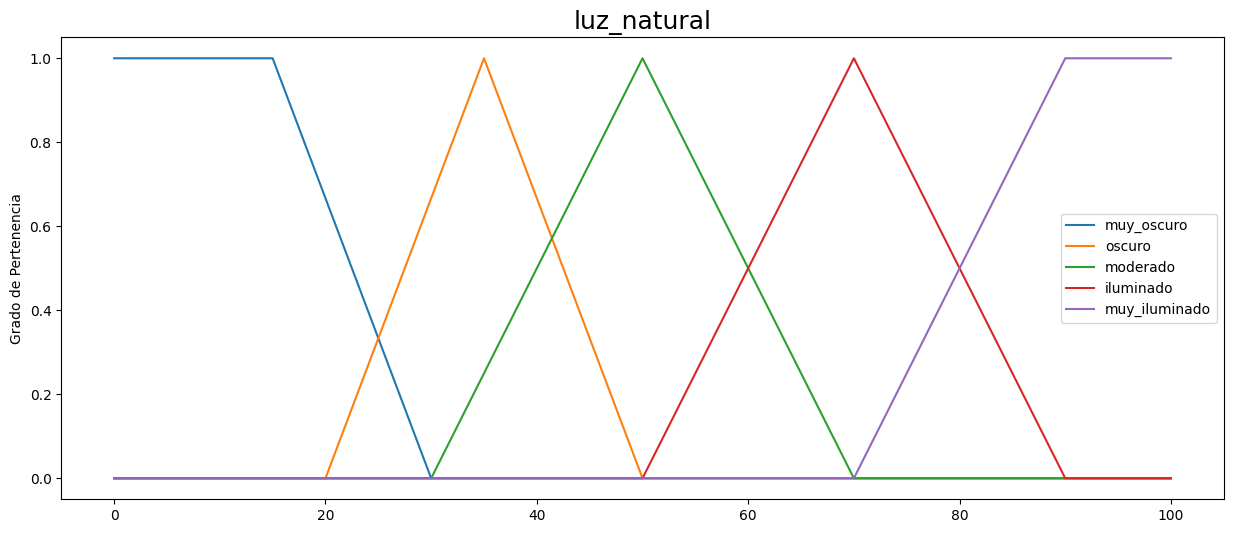

In [13]:
from control_utils import plot_universe
    
plot_universe(luz_natural, figsize=(15, 6))

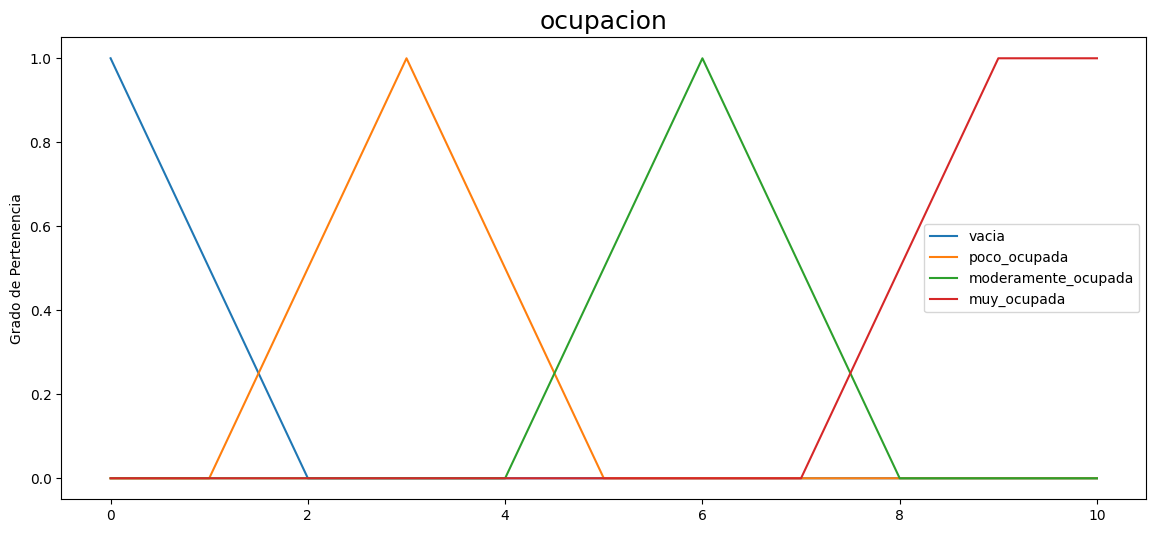

In [14]:
plot_universe(ocupacion)

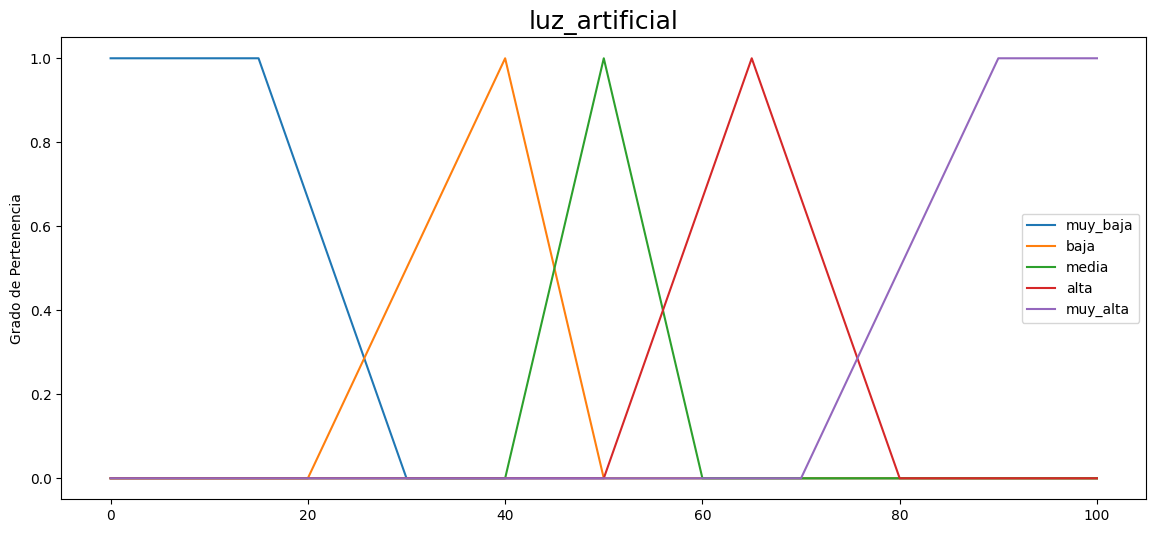

In [15]:
plot_universe(luz_artificial)

## creando las reglas

In [16]:
# Creación de las reglas
regla1 = ctrl.Rule(luz_natural['muy_oscuro'] & ocupacion['vacia'], luz_artificial['muy_baja'])
regla2 = ctrl.Rule(luz_natural['oscuro'] & ocupacion['poco_ocupada'], luz_artificial['baja'])
regla3 = ctrl.Rule(luz_natural['moderado'] & ocupacion['moderamente_ocupada'], luz_artificial['media'])
regla4 = ctrl.Rule(luz_natural['iluminado'] & ocupacion['muy_ocupada'], luz_artificial['alta'])
regla5 = ctrl.Rule(luz_natural['muy_iluminado'], luz_artificial['muy_alta'])

# Si necesitas más reglas, puedes seguir este patrón para definirlas.

# Creación del sistema de control
sistema_control_iluminacion = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5])

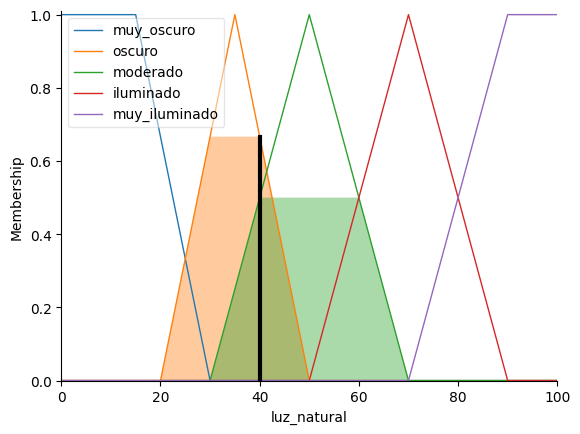

In [17]:
simulacion = ctrl.ControlSystemSimulation(sistema_control_iluminacion)

simulacion.input['luz_natural'] = 40
simulacion.input['ocupacion'] = 2
simulacion.compute()

luz_natural.view(sim=simulacion)
# fig = ocupacion.view(sim=simulacion)[0]
# fig = luz_artificial.view(sim=simulacion)[0]

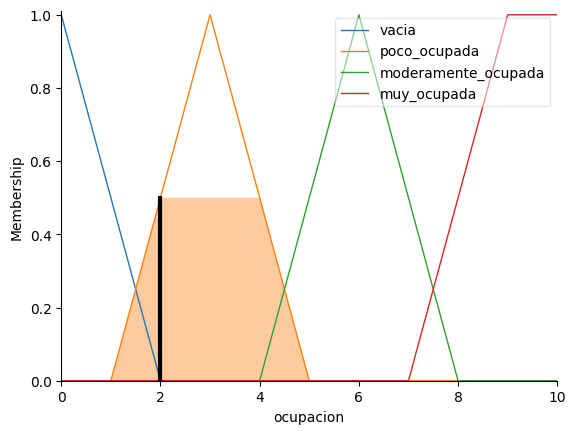

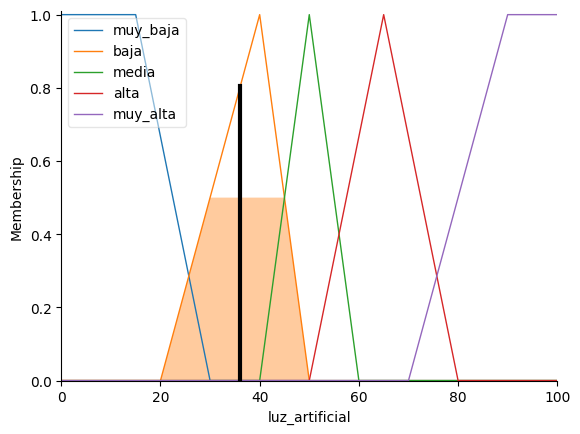

In [18]:
ocupacion.view(sim= simulacion)
luz_artificial.view(sim= simulacion)

In [19]:
simulacion.output['luz_artificial']

36.11111111111111

In [20]:
from control_utils import plot_fuzzy_simulation

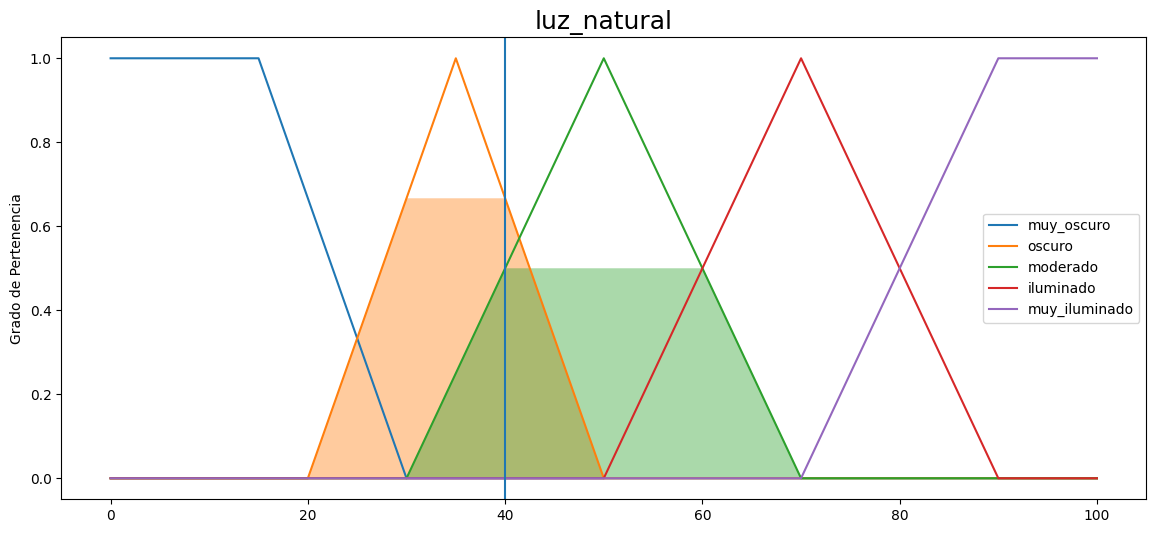

In [21]:
plot_fuzzy_simulation(luz_natural, simulation=simulacion)

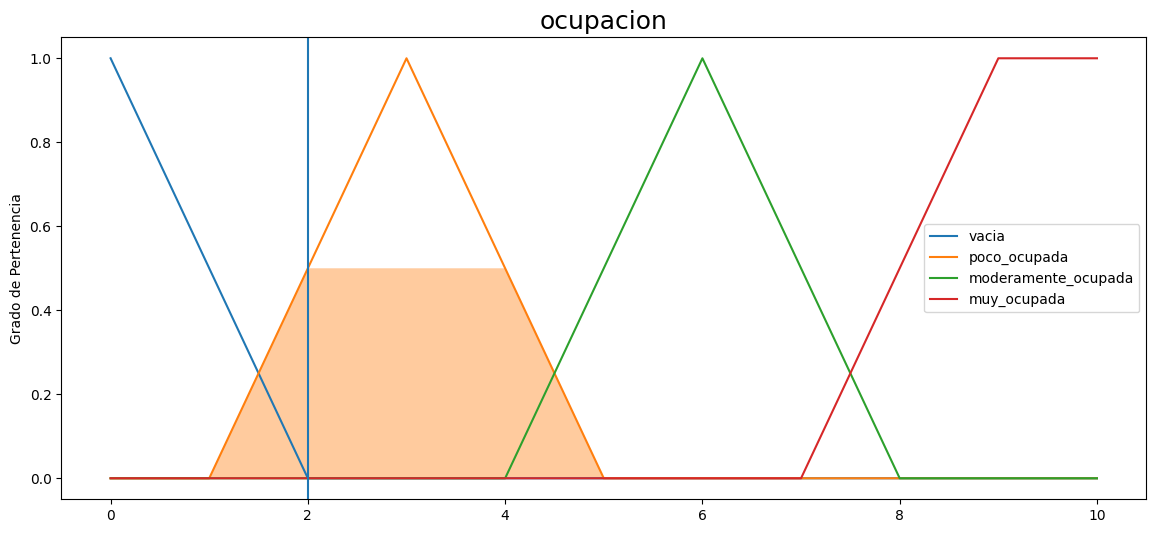

In [22]:
plot_fuzzy_simulation(ocupacion, simulation=simulacion)

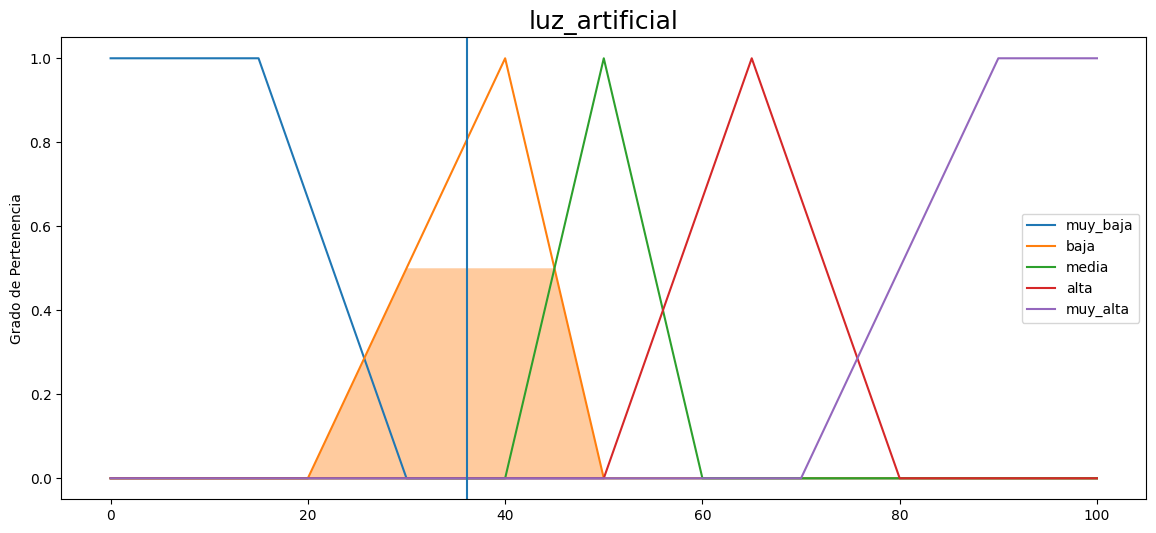

In [23]:
plot_fuzzy_simulation(luz_artificial, simulation=simulacion)

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

# def plot_output_membership_with_defuzzification(variable, simulation, figsize=(8, 5), title=None):
#     """
#     Visualiza la función de membresía de salida y resalta el área utilizada en la desdifusificación.
#     """
#     plt.figure(figsize=figsize)
    
#     # Obtener el valor desdifuso (por ejemplo, usando el centroide)
#     valor_desdifuso = fuzz.defuzz(variable.universe, variable.mf, 'centroid')
#     valor_activado = fuzz.interp_membership(variable.universe, variable.mf, valor_desdifuso)

#     # Graficar la función de pertenencia
#     plt.plot(variable.universe, variable.mf, label='Función de Pertenencia')
    
#     # Resaltar el área hasta el valor desdifuso
#     plt.fill_between(variable.universe, np.zeros_like(variable.mf), variable.mf, where=variable.universe <= valor_desdifuso, color='grey', alpha=0.3)
    
#     # Añadir una línea vertical en el valor desdifuso
#     plt.axvline(x=valor_desdifuso, color='red', linestyle='--', label='Valor Desdifuso (Centroide)')

#     # Personalizar el gráfico
#     if title:
#         plt.title(title)
#     else:
#         plt.title('Variable de Salida y Desdifusificación')
    
#     plt.xlabel('Universo de Discurso')
#     plt.ylabel('Grado de Pertenencia')
#     plt.legend()

#     plt.show()

# Ejemplo de uso
# plot_output_membership_with_defuzzification(tu_variable_de_salida, tu_simulacion)


# plot_output_membership_with_defuzzification(luz_artificial, simulacion)